<a href="https://colab.research.google.com/github/NanzibaBasnin/HCI-Integrated-Gesture-Recognition/blob/main/main_hg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#zip_ref = zipfile.ZipFile('/content/gdrive/My Drive/handgesture.zip', 'r')
#zip_ref.extractall("/tmp")
#zip_ref.clos
%matplotlib inline
from google.colab import drive
#import zipfile
drive.mount('/content/gdrive')
#!unzip leapGestRecog.zip
import os

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
root_path='./gdrive/My Drive/HGdataset/'

In [ ]:
#tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [ ]:
#helper libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

In [ ]:
#Sklearn
from sklearn.model_selection import train_test_split
#helps with organization of training
from sklearn.metrics import confusion_matrix
print(tf.__version__)
from sklearn.preprocessing import Normalizer

1.15.0


In [ ]:
#we need to get all the paths for the images to later load them
imagepaths = []
# going through all the files and sumdirectories inside a folder and saving path to image inside list
for dirs, sub_dirs, files in os.walk(root_path, topdown=False):
  for name in files:
    path = os.path.join(dirs, name)
    #print(path)
    if path.endswith("png"):
      imagepaths.append(path)


print(len(imagepaths))
print(imagepaths[0])

10024
./gdrive/My Drive/HGdataset/07/04_handshake/train_preryrrson_01_236.png


In [ ]:
# This function is used more for debugging and showing results later. It plots the image into the notebook

def plot_image(path):
  img = cv2.imread(path) # Reads the image into a numpy.array
  img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts into the corret colorspace (RGB)
  print(img_cvt.shape) # Prints the shape of the image just to check
  plt.grid(False) # Without grid so we can see better
  plt.imshow(img_cvt) # Shows the image
  plt.xlabel("Width")
  plt.ylabel("Height")
  plt.title("Image " + path)

(240, 320)


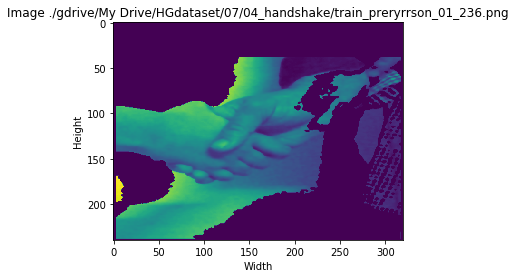

In [ ]:
plot_image(imagepaths[0]) #We plot the first image from our imagepaths array

In [ ]:
X = [] # Image data
y = [] # Labels

In [ ]:
print (imagepaths[0].split("/")[5].split("_")[0][1])

4


In [ ]:
for path in imagepaths:
   img = cv2.imread(path) # Reads image and returns np.array
   img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts into the corret colorspace (GRAY)
   img = cv2.resize(img, (80, 80)) # Reduce image size so training can be faster
   X.append(img)
   category = path.split("/")[5] # number_category
   label = int(category.split("_")[0][1]) # We need to convert 10_down to 00_down, or else it crashes
   y.append(label)

X = np.array(X, dtype="uint8")
X = X.reshape(len(imagepaths), 80, 80, 1) # Needed to reshape so CNN knows it's different images
y = np.array(y)
print("Images loaded: ", len(X))
print("Labels loaded: ", len(y))

print(y[0], imagepaths[0]) # Debugging

(240, 320)
04_handshake
train_preryrrson_01_236.png


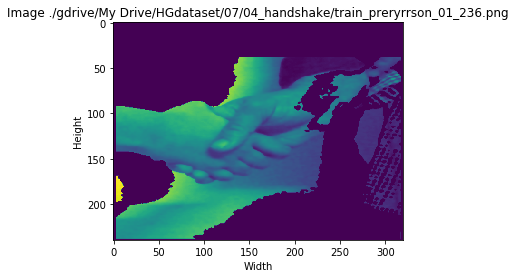

In [ ]:
for images in imagepaths:
  plot_image(images)
  #print label
  print(images.split("/")[5])
  print(images.split("/")[6])
  break

In [ ]:
ts = 0.3 # Percentage of images that we want to use for testing. The rest is used for training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import MaxPool2D,Reshape
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.layers import TimeDistributed
from keras.layers import LSTM, Dense
from keras import optimizers
from keras.models import Sequential
from keras.layers import TimeDistributed
from keras.layers import MaxPooling2D
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [ ]:
 #Configures the model for training
#model.compile(loss='mse', optimizer='rmsprop', metrics=['mse','mae', 'acc'])
#model.summary()

model.compile(optimizer='adam', # Optimization routine, which tells the computer how to adjust the parameter values to minimize the loss function.
              loss='sparse_categorical_crossentropy', # Loss function, which tells us how bad our predictions are.
              metrics=['accuracy']) # List of metrics to be evaluated by the model during training and testing.
model.summary()






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 76, 76, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 36, 36, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 18, 18, 64)        0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 18, 1152)       

In [ ]:
#model.fit(train_images, train_labels, epochs=10)


#Trains the model for a given number of epochs (iterations on a dataset) and validates it.
history = model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=2, validation_data=(X_test, y_test))
earlyStopping = EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='max')
mcp_save = ModelCheckpoint('mymodel_gray_updated.h5', save_best_only=True, verbose=1, monitor='val_acc', mode='max')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_acc', factor=0.1, patience=7, verbose=1, min_delta=1e-4, mode='max')
result = model.predict(X_test)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 7016 samples, validate on 3008 samples
Epoch 1/100





 - 82s - loss: 1.9564 - acc: 0.3093 - val_loss: 1.6190 - val_acc: 0.4638
Epoch 2/100
 - 80s - loss: 1.4934 - acc: 0.4957 - val_loss: 1.2669 - val_acc: 0.5688
Epoch 3/100
 - 81s - loss: 1.2388 - acc: 0.5733 - val_loss: 1.0562 - val_acc: 0.6353
Epoch 4/100
 - 81s - loss: 1.1021 - acc: 0.6246 - val_loss: 1.0554 - val_acc: 0.6220
Epoch 5/100
 - 80s - loss: 0.9892 - acc: 0.6525 - val_loss: 0.8080 - val_acc: 0.7234
Epoch 6/100
 - 80s - loss: 0.8406 - acc: 0.7122 - val_loss: 0.6815 - val_acc: 0.7610
Epoch 7/100
 - 81s - loss: 0.7629 - acc: 0.7343 - val_loss: 0.5943 - val_acc: 0.7929
Epoch 8/100
 - 80s - loss: 0.6223 - acc: 0.7769 - val_loss: 0.5799 - val_acc: 0.7869
Epoch 9/100
 - 80s - loss: 0.5781 - acc: 0.7946 - val_loss: 0.4167 - val_acc: 0.8650
Epoch 10/100
 - 80s - loss: 0.5203 - acc: 0.8187 - val_loss: 0.3972 - val_acc: 0.8830

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# New Section

In [ ]:
result= model.predict(X_test)

In [ ]:
# Save entire model to a HDF5 file
model.save('handrecognition_model.h5')

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_acc*100))

3008/3008 [==============================] - 9s 3ms/step
Test accuracy: 98.57%


In [ ]:
result = model.predict(X_test) # Make predictions towards the test set


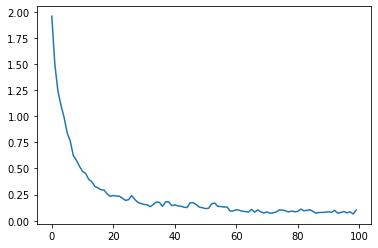

In [ ]:
plt.plot(history.history['loss'])
plt.show()

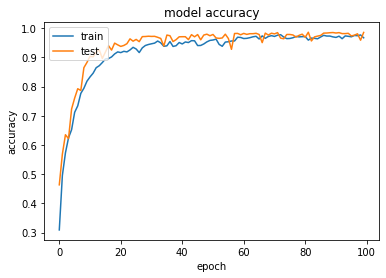

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

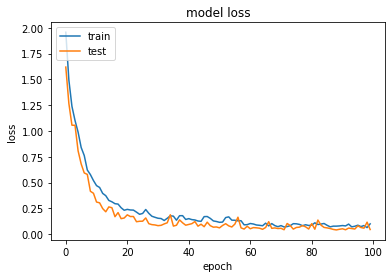

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
np.argmax(result[0]), y_test[0] # If same, got it right

(1, 1)

In [ ]:
# Function to plot images and labels for validation purposes
def validate_9_images(predictions_array, true_label_array, img_array):
  # Array for pretty printing and then figure size
  class_names = ["pray", "one", "fist", "handshake", "ok", "heart", "dua", "one", "palm", "pray"]
  plt.figure(figsize=(15,5))

  for i in range(1, 10):
    # Just assigning variables
    prediction = predictions_array[i]
    true_label = true_label_array[i]
    img = img_array[i]
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

    # Plot in a good way
    plt.subplot(3,3,i)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(prediction) # Get index of the predicted label from prediction

    # Change color of title based on good prediction or not
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'

    plt.xlabel("Predicted: {} {:2.0f}% (True: {})".format(class_names[predicted_label],
                                  100*np.max(prediction),
                                  class_names[true_label]),
                                  color=color)
  plt.show()

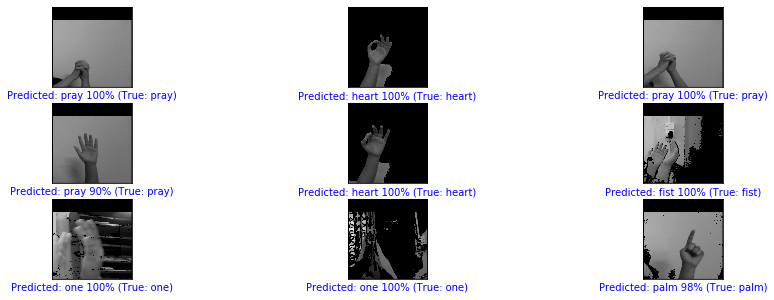

In [ ]:
validate_9_images(result, y_test, X_test)

In [ ]:
y_pred = np.argmax(result, axis=1) # Transform predictions into 1-D array with label number

In [ ]:
# H = Horizontal
# V = Vertical

pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=["Predicted clap", "Predicted dua (H)", "Predicted fist", "Predicted handshake (H)", "Predicted ok (V)", "Predicted heart", "Predicted namaste", "Predicted one", "Predicted palm (V)", "Predicted pray"],
             index=["Actual clap", "Actual dua (H)", "Actual fist", "Actual handshake (H)", "Actual ok (V)", "Actual heart", "Actual namaste", "Actual one", "Actual palm (V)", "Actual pray"])

,Predicted clap,Predicted dua (H),Predicted fist,Predicted handshake (H),Predicted ok (V),Predicted heart,Predicted namaste,Predicted one,Predicted palm (V),Predicted pray
Actual clap,294,1,1,0,0,2,0,0,0,4
Actual dua (H),2,288,1,0,3,0,2,1,0,0
Actual fist,0,0,291,0,0,0,0,0,0,0
Actual handshake (H),0,0,0,327,0,0,0,0,0,0
Actual ok (V),0,0,0,0,308,0,0,0,0,0
Actual heart,0,3,0,0,0,288,0,0,0,1
Actual namaste,0,5,0,0,1,1,315,0,0,0
Actual one,0,0,0,0,0,0,4,292,0,0
Actual palm (V),0,0,0,0,0,1,0,0,285,0
Actual pray,0,0,1,0,1,8,0,0,0,277


In [ ]:
import numpy as np
cm1 = np.array([[294,   1,   1,   0,   0,   2,   0,   0,   0,   4],
               [ 1, 288,   1,   0,   3,  0,   2,   1,   0,   0],
               [  0,  1, 290,   0,   0,   0,   0,   0,   0,   0],
               [  0,   0,   0, 327,   0,   0,   0,   0,   0,   0],
               [  0,   0,   0,   0, 308,   0,   0,   0,   1,   0],
               [  0,   3,   0,   0,   0, 288,   0,   0,   0,   1],
               [  0,   5,   0,   0,   1,   1, 315,   0,   0,   0],
               [  0,   0,   0,   0,   0,   0,   4, 292,   0,   0],
               [  0,   0,   0,   0,   0,   1,   0,   0, 285,   0],
               [  0,   0,   1,   0,   1,   8,   0,   0,   0, 277]])

In [ ]:
def precision(label, confusion_matrix):
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label] / col.sum()

In [ ]:
def recall(label, confusion_matrix):
    row = confusion_matrix[label, :]
    return confusion_matrix[label, label] / row.sum()

In [ ]:
def precision_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_precisions = 0
    for label in range(rows):
        sum_of_precisions += precision(label, confusion_matrix)
    return sum_of_precisions / rows

In [ ]:
def recall_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_recalls = 0
    for label in range(columns):
        sum_of_recalls += recall(label, confusion_matrix)
    return sum_of_recalls / columns

In [ ]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements

In [ ]:
print("label precision recall")
for label in range(10):
    print(f"{label:5d} {precision(label, cm1):9.3f} {recall(label, cm1):6.3f}")
print("precision total:", precision_macro_average(cm1))
print("recall total:", recall_macro_average(cm1))

label precision recall
    0     0.997  0.974
    1     0.966  0.973
    2     0.990  0.997
    3     1.000  1.000
    4     0.984  0.997
    5     0.960  0.986
    6     0.981  0.978
    7     0.997  0.986
    8     0.997  0.997
    9     0.982  0.965
precision total: 0.9853508215748533
recall total: 0.9852519251519579


In [ ]:
fmeasure1 = (2 * precision_macro_average(cm1) * recall_macro_average(cm1)) / (precision_macro_average(cm1) + recall_macro_average(cm1))
print("fmeasure: ", fmeasure1)
print("Accuracy: " , accuracy(cm1))
print("########################")

fmeasure:  0.9853013708818038
Accuracy:  0.9853723404255319
########################
